In [128]:
import numpy as np
from skimage import io, color
from matplotlib import pyplot as plt
image_size = 256
# image = np.random.rand(image_size, image_size, 3)
# image[:, :, 0] = image[:, :, 0] * 100
# image[:, :, 1:] = image[:, :, 1:] * 256 - 128

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


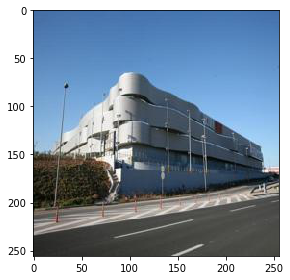

In [132]:
image = io.imread("test.jpg")
io.imshow(image)
plt.show()
image = color.rgb2lab(image)

In [130]:
bins = np.zeros((image_size, image_size))
binned = np.zeros((image_size, image_size, 676))
image_positived = image + 128
image_colors_in_bins = np.floor(image_positived/10).astype(int)
one_hot = np.eye(676)
bins = 26*image_colors_in_bins[:, :, 1] + image_colors_in_bins[:, :, 2]
binned[:, :] = one_hot[bins[:, :]]

In [105]:
print(np.argwhere(binned[:, :]==1)[:, 2].reshape((image_size, image_size)))

[[134 331 231 ... 480 517 601]
 [646 350 283 ... 518 637 312]
 [153 135 340 ... 590 462 372]
 ...
 [ 55 243 112 ... 254 278 104]
 [163 117 338 ... 533  10 344]
 [200 206 426 ... 641 673 379]]


In [106]:
bins[:4, :4]

array([[134, 331, 231, 179],
       [646, 350, 283, 106],
       [153, 135, 340, 367],
       [487, 298, 455, 144]])

D:\Anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


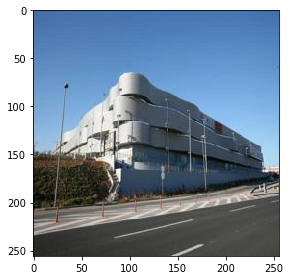

In [131]:
reverted_image = np.zeros((image_size, image_size, 3))
image_binned = np.argwhere(binned[:, :]==1)[:, 2].reshape((image_size, image_size))
reverted_image[:, :, 0] = image[:, :, 0]
reverted_image[:, :, 2] = np.mod(image_binned ,np.full((image_size, image_size), 26)) 
reverted_image[:, :, 1] = (image_binned - reverted_image[:, :, 2]) / 26
io.imshow(color.lab2rgb(image))

plt.show()